<a href="https://colab.research.google.com/github/pratyushvaidya/Machine-Learning-Lab-Assignments/blob/master/Logistic_Regression_with_diffrent_scalers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Logistic Regression (1)

Import modules

In [0]:
import numpy as np
import pandas as pd

Normalization : Min-Max Scaler

In [0]:
def normalize(X):
  mins = np.min(X, axis=0)
  maxs = np.max(X,axis=0)

  diff = maxs-mins
  print(mins,maxs)
  return 1-((maxs-X)/diff)

Pre-Activation and Activation Calculation

In [0]:
def sigmoid(X,theta):
  return 1.0/(1 + np.exp(-np.dot(X, theta.T)))

Cost Function

In [0]:
def cf(X,Y,theta):
  # COST = Y*log(h(X)) - (1-Y)*log(1-h(X))
  cost = Y*np.log(sigmoid(X,theta)) - (1-Y)*np.log(1-sigmoid(X,theta))
  return np.mean(cost)

Calculating Derivative

In [0]:
def derivative(X, Y, theta):
  # DERIVATIVE = [Y(PREDICTION) - Y(ACTUAL)].TRANSPOSE * X
  return np.dot((sigmoid(X,theta) - Y.reshape(X.shape[0], -1)).T,X)

Gradient Descent Algorihm

In [0]:
def gradient_descent(X,Y,theta,lr=0.01,conv=.001):
  cost = cf(X,Y,theta)
  change = 1
  epochs = 1
  while(change>conv):
    old_cost = cost
    theta = theta - lr*derivative(X,Y,theta)
    cost = cf(X,Y,theta)
    change = old_cost-cost
    epochs+=1
  return theta, epochs

Predict

In [0]:
def predict(X,theta):
  Y_pred = sigmoid(X,theta)
  Y_pred = np.where(Y_pred>0.5, 1, 0)
  return np.squeeze(Y_pred)

Main Method

In [0]:
if __name__ == "__main__":
  data = np.array(pd.read_csv("dataset1.csv"))

  X = data[:,:2]
  Y = data[:,2]
  #Normalizing the dataset : converting it's value between 0 and 1
  X = normalize(X)
  #horizontal stacking of ones in the X for bias
  X = np.hstack((np.matrix(np.ones(X.shape[0])).T,X))
  
  theta = np.matrix(np.zeros(X.shape[1]))

  theta, epochs = gradient_descent(X, Y, theta)

  Y_predicted = predict(X,theta)
  print(theta, epochs)
  print("Correctly predicted: ", np.sum(Y==Y_predicted))

[0.9008 1.169 ] [8.9221 8.5676]
[[0.19242517 0.05065823]
 [0.41640382 0.09866732]
 [0.6119831  0.17599276]
 [0.69084812 0.29600195]
 [0.6119831  0.27999892]
 [0.68453991 0.35733787]
 [0.74448032 0.44266483]
 [0.73501801 0.33867218]
 [0.90536447 0.4826724 ]
 [0.81071647 0.36800205]
 [0.83911585 0.4640067 ]
 [0.85488637 0.61599492]
 [0.70661863 0.51200227]
 [0.55520926 0.3813289 ]
 [0.44479074 0.25066905]
 [0.25867378 0.11999567]
 [0.19242517 0.01332685]
 [0.         0.        ]
 [0.15142184 0.07732544]
 [0.29653547 0.02932987]
 [0.40694152 0.05333441]
 [0.49211474 0.09600465]
 [0.30284368 0.21866299]
 [0.52996397 0.32266915]
 [0.6687694  0.3920066 ]
 [0.6687694  0.43466331]
 [0.78548365 0.05065823]
 [0.84226996 0.16800476]
 [0.65299889 0.08266429]
 [0.44794485 0.03199254]
 [0.49526885 0.19467196]
 [0.57728797 0.25867056]
 [0.63721591 0.37332739]
 [0.77917545 0.48533506]
 [0.84857816 0.55999784]
 [0.92428908 0.61333225]
 [0.9495219  0.53333063]
 [0.97790882 0.5733382 ]
 [0.86750277 0.357

###Logistic Regression using Z-score Scaler

[[ 1.00000000e+00 -1.26676148e+00 -1.70967165e+00]
 [ 1.00000000e+00 -3.83105284e-01 -1.53496683e+00]
 [ 1.00000000e+00  3.88507676e-01 -1.25357993e+00]
 [ 1.00000000e+00  6.99651454e-01 -8.16867057e-01]
 [ 1.00000000e+00  3.88507676e-01 -8.75101998e-01]
 [ 1.00000000e+00  6.74763886e-01 -5.93665909e-01]
 [ 1.00000000e+00  9.11244962e-01 -2.83161535e-01]
 [ 1.00000000e+00  8.73913611e-01 -6.61590278e-01]
 [ 1.00000000e+00  1.54597630e+00 -1.37574184e-01]
 [ 1.00000000e+00  1.17256442e+00 -5.54859010e-01]
 [ 1.00000000e+00  1.28460766e+00 -2.05498553e-01]
 [ 1.00000000e+00  1.34682658e+00  3.47585826e-01]
 [ 1.00000000e+00  7.61870372e-01 -3.08429168e-02]
 [ 1.00000000e+00  1.64519569e-01 -5.06362683e-01]
 [ 1.00000000e+00 -2.71111231e-01 -9.81833265e-01]
 [ 1.00000000e+00 -1.00539284e+00 -1.45735303e+00]
 [ 1.00000000e+00 -1.26676148e+00 -1.84552039e+00]
 [ 1.00000000e+00 -2.02593066e+00 -1.89401671e+00]
 [ 1.00000000e+00 -1.42853067e+00 -1.61262981e+00]
 [ 1.00000000e+00 -8.56018250e-

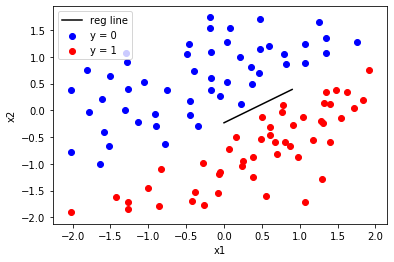

In [0]:
import csv 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
  
def MinMax(X): 
    ''' 
    function to normalize feature matrix, X 
    '''
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = 1 - ((maxs - X)/rng) 
    return norm_X 
  
  
def ZScore(X):
    '''
    function to normalize feature matrix, X
    '''
    diff = X - np.mean(X)
    norm_X = diff/np.std(X)
    return norm_X


def logistic_func(theta, X): 
    ''' 
    logistic(sigmoid) function 1/1+e^-theta.T * X
    '''
    return 1.0/(1 + np.exp(-np.dot(X, theta.T))) 
  
  
def log_gradient(theta, X, y): 
    ''' 
    logistic gradient function [Y(PREDICTION)- Y(ACTUAL)).Transpose *  X
    '''
    first_calc = logistic_func(theta, X) - y.reshape(X.shape[0], -1) 
    final_calc = np.dot(first_calc.T, X) 
    return final_calc 
  
  
def cost_func(theta, X, y): 
    ''' 
    cost function, J 
    '''
    log_func_v = logistic_func(theta, X) 
    y = np.squeeze(y) 
    step1 = y * np.log(log_func_v) 
    step2 = (1 - y) * np.log(1 - log_func_v) 
    final = -step1 - step2 
    return np.mean(final) 
  
  
def grad_desc(X, y, theta, lr=.01, converge_change=.001): 
    ''' 
    gradient descent function 
    '''
    cost = cost_func(theta, X, y) 
    change_cost = 1
    num_iter = 1
      
    while(change_cost > converge_change): 
        old_cost = cost 
        theta = theta - (lr * log_gradient(theta, X, y)) 
        cost = cost_func(theta, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1
      
    return theta, num_iter  
  
  
def pred_values(theta, X): 
    ''' 
    function to predict labels 
    '''
    pred_prob = logistic_func(theta, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value) 
  
  
def plot_reg(X, y, theta): 
    ''' 
    function to plot decision boundary 
    '''
    # labelled observations 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
      
    # plotting points with diff color for diff label 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
      
    # plotting decision boundary 
    x1 = np.arange(0, 1, 0.1) 
    x2 = -(theta[0,0] + theta[0,1]*x1)/theta[0,2] 
    plt.plot(x1, x2, c='k', label='reg line') 
  
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show() 
      
  
      
if __name__ == "__main__": 
    # load the dataset

    dataset = pd.read_csv('dataset1.csv')  
    dataset=np.array(dataset)
    # normalizing feature matrix 
    X = ZScore(dataset[:, :-1]) 
    # stacking columns wth all ones in feature matrix 
    X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 
    print(X)
    # response vector 
    y = dataset[:, -1] 
    print (y )
    # initial beta values 
    theta = np.matrix(np.zeros(X.shape[1])) 
    print (theta )
    # beta values after running gradient descent 
    theta, num_iter = grad_desc(X, y, theta) 
  
    # estimated beta values and number of iterations 
    print("Estimated regression coefficients:", theta) 
    print("No. of iterations:", num_iter) 
  
    # predicted labels 
    y_pred = pred_values(theta, X) 
      
    # number of correctly predicted labels 
    print("Correctly predicted labels:", np.sum(y == y_pred)) 
      
    # plotting regression line 
    plot_reg(X, y, theta) 

###Logistic Regression using Min-Max Scaler

[[1.         0.19242517 0.05065823]
 [1.         0.41640382 0.09866732]
 [1.         0.6119831  0.17599276]
 [1.         0.69084812 0.29600195]
 [1.         0.6119831  0.27999892]
 [1.         0.68453991 0.35733787]
 [1.         0.74448032 0.44266483]
 [1.         0.73501801 0.33867218]
 [1.         0.90536447 0.4826724 ]
 [1.         0.81071647 0.36800205]
 [1.         0.83911585 0.4640067 ]
 [1.         0.85488637 0.61599492]
 [1.         0.70661863 0.51200227]
 [1.         0.55520926 0.3813289 ]
 [1.         0.44479074 0.25066905]
 [1.         0.25867378 0.11999567]
 [1.         0.19242517 0.01332685]
 [1.         0.         0.        ]
 [1.         0.15142184 0.07732544]
 [1.         0.29653547 0.02932987]
 [1.         0.40694152 0.05333441]
 [1.         0.49211474 0.09600465]
 [1.         0.30284368 0.21866299]
 [1.         0.52996397 0.32266915]
 [1.         0.6687694  0.3920066 ]
 [1.         0.6687694  0.43466331]
 [1.         0.78548365 0.05065823]
 [1.         0.84226996 0.16

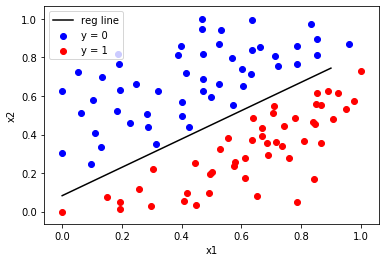

In [0]:
import csv 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
  
def MinMax(X): 
    ''' 
    function to normalize feature matrix, X 
    '''
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = 1 - ((maxs - X)/rng) 
    return norm_X 
  
  
def ZScore(X):
    '''
    function to normalize feature matrix, X
    '''
    diff = X - np.mean(X)
    norm_X = diff/np.std(X)
    return norm_X


def logistic_func(theta, X): 
    ''' 
    logistic(sigmoid) function 1/1+e^-theta.T * X
    '''
    return 1.0/(1 + np.exp(-np.dot(X, theta.T))) 
  
  
def log_gradient(theta, X, y): 
    ''' 
    logistic gradient function [Y(PREDICTION)- Y(ACTUAL)).Transpose *  X
    '''
    first_calc = logistic_func(theta, X) - y.reshape(X.shape[0], -1) 
    final_calc = np.dot(first_calc.T, X) 
    return final_calc 
  
  
def cost_func(theta, X, y): 
    ''' 
    cost function, J 
    '''
    log_func_v = logistic_func(theta, X) 
    y = np.squeeze(y) 
    step1 = y * np.log(log_func_v) 
    step2 = (1 - y) * np.log(1 - log_func_v) 
    final = -step1 - step2 
    return np.mean(final) 
  
  
def grad_desc(X, y, theta, lr=.01, converge_change=.001): 
    ''' 
    gradient descent function 
    '''
    cost = cost_func(theta, X, y) 
    change_cost = 1
    num_iter = 1
      
    while(change_cost > converge_change): 
        old_cost = cost 
        theta = theta - (lr * log_gradient(theta, X, y)) 
        cost = cost_func(theta, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1
      
    return theta, num_iter  
  
  
def pred_values(theta, X): 
    ''' 
    function to predict labels 
    '''
    pred_prob = logistic_func(theta, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value) 
  
  
def plot_reg(X, y, theta): 
    ''' 
    function to plot decision boundary 
    '''
    # labelled observations 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
      
    # plotting points with diff color for diff label 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
      
    # plotting decision boundary 
    x1 = np.arange(0, 1, 0.1) 
    x2 = -(theta[0,0] + theta[0,1]*x1)/theta[0,2] 
    plt.plot(x1, x2, c='k', label='reg line') 
  
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show() 
      
  
      
if __name__ == "__main__": 
    # load the dataset

    dataset = pd.read_csv('dataset1.csv')  
    dataset=np.array(dataset)
    # normalizing feature matrix 
    X = MinMax(dataset[:, :-1]) 
    # stacking columns wth all ones in feature matrix 
    X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 
    print(X)
    # response vector 
    y = dataset[:, -1] 
    print (y )
    # initial beta values 
    theta = np.matrix(np.zeros(X.shape[1])) 
    print (theta )
    # beta values after running gradient descent 
    theta, num_iter = grad_desc(X, y, theta) 
  
    # estimated beta values and number of iterations 
    print("Estimated regression coefficients:", theta) 
    print("No. of iterations:", num_iter) 
  
    # predicted labels 
    y_pred = pred_values(theta, X) 
      
    # number of correctly predicted labels 
    print("Correctly predicted labels:", np.sum(y == y_pred)) 
      
    # plotting regression line 
    plot_reg(X, y, theta) 